In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#### 1 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

In [2]:
water_data = pd.read_csv('water.csv')
water_data

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


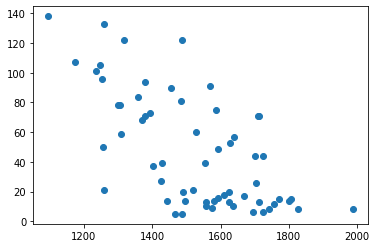

In [4]:
# точечный график зависимости 
plt.scatter(water_data["mortality"], water_data["hardness"])
plt.show()

In [5]:
target_data = water_data[['mortality','hardness']]

In [6]:
# Спирмен
target_data_spearmen = target_data.corr(method='spearman')
target_data_spearmen.head()

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [7]:
# Пирсон
target_data_pearson = target_data.corr()
target_data_pearson.head()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [8]:
# линейная регрессия 
X = water_data[['mortality']].values
Y = water_data['hardness'].values

In [9]:
model = LinearRegression()
model.fit(X, Y)
model.score(X, Y)

0.4288267193124973

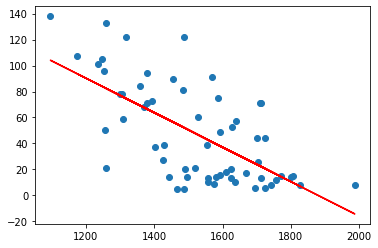

In [10]:
plt.scatter(water_data["mortality"], water_data["hardness"])
plt.plot(water_data['mortality'], model.predict(water_data[['mortality']]), c='r')
plt.show()

In [11]:
# коэфициент детерминации
model.coef_

array([-0.13292453])

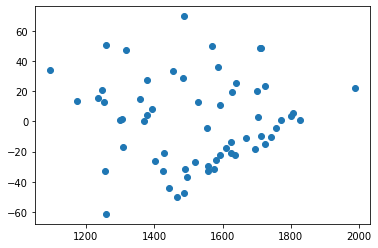

In [12]:
# график остатков 
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
plt.scatter(X[:, 1], results.resid)
plt.show()

Результаты первого задания:
- мы видим обратную корреляцию между смертностью и жесткостью воды
- остатки разбросаны очень широко - линейная корреляция не полно дает нам представление о зависимости этих двух показателей

#### 2 Задание. Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

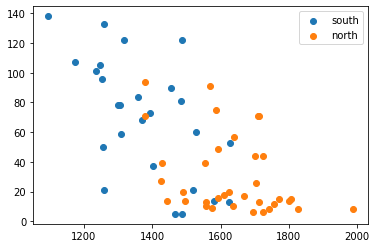

In [13]:
south = water_data.loc[water_data.location == 'South']
north = water_data.loc[water_data.location == 'North']
plt.scatter(south['mortality'], south['hardness'])
plt.scatter(north['mortality'], north['hardness'])
plt.legend(["south", "north"])
plt.show()

In [14]:
north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [15]:
north[['mortality', 'hardness']].corr(method="spearman")

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [16]:
south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [17]:
south[['mortality', 'hardness']].corr(method="spearman")

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


Можем видеть, что корреляция между смертностью и жесткостью воды на юге сильно выше, чем на севере

0.1358643664207171


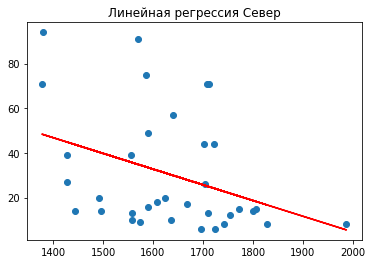

In [18]:
# линейная регрессия север
X_n = north[['mortality']].values
Y_n = north['hardness'].values

model_n = LinearRegression()
model_n.fit(X_n, Y_n)
print(model_n.score(X_n, Y_n))

plt.scatter(north["mortality"], north["hardness"])
plt.title("Линейная регрессия Север")
plt.plot(north['mortality'], model_n.predict(north[['mortality']]), c='r')
plt.show()

0.3625885624364601


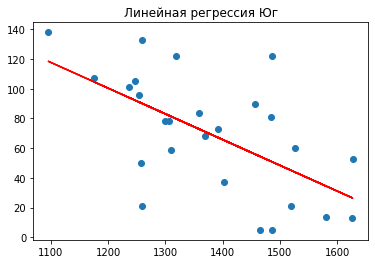

In [19]:
# линейная регрессия юг
X_s = south[['mortality']].values
Y_s = south['hardness'].values

model_s = LinearRegression()
model_s.fit(X_s, Y_s)
print(model_s.score(X_s, Y_s))

plt.scatter(south["mortality"], south["hardness"])
plt.title("Линейная регрессия Юг")
plt.plot(south['mortality'], model_s.predict(south[['mortality']]), c='r')
plt.show()

In [20]:
print(f"Коэффициент детерминации на севере: {model_n.coef_}\nКоэффициент детерминации на юге: {model_s.coef_}")

Коэффициент детерминации на севере: [-0.07034712]
Коэффициент детерминации на юге: [-0.17326199]


Видим еще более отчетливо, судя по коэффициенту зависимости, что на юге корреляция более отчетлива, чем на севере 

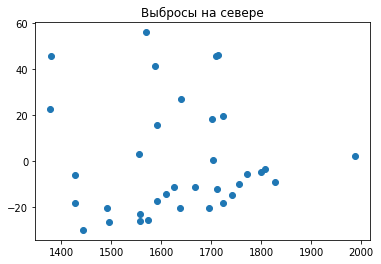

In [21]:
# выбросы для севера
X_n = sm.add_constant(X_n)
model_n = sm.OLS(Y_n, X_n)
results_n = model_n.fit()
plt.title("Выбросы на севере")
plt.scatter(X_n[:, 1], results_n.resid)
plt.show()

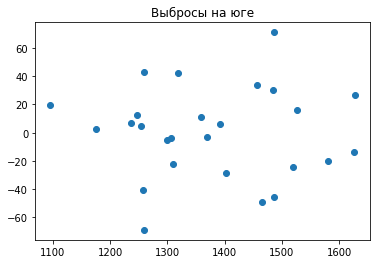

In [22]:
# выбросы для юга
X_s = sm.add_constant(X_s)
model_s = sm.OLS(Y_s, X_s)
results_s = model_s.fit()
plt.scatter(X_s[:, 1], results_s.resid)
plt.title("Выбросы на юге")
plt.show()